In [1]:
from copy import copy

import matplotlib.pyplot as plt
import numpy as np
import time

from lcode2dPy.plasma.initialization import init_plasma
from lcode2dPy.plasma.solver import CylindricalPlasmaSolver
from lcode2dPy.beam.beam_slice import BeamSlice
from lcode2dPy.beam.beam_io import MemoryBeamSource, MemoryBeamDrain
from lcode2dPy.push_solvers.push_solver import PusherAndSolver
from lcode2dPy.beam_generator.beam_generator import *

from lcode2dPy.config.default_config import default_config

In [2]:
start_time = time.time()
config = copy(default_config)
config.set('geometry', 'c')


solver = CylindricalPlasmaSolver(config)

R_MAX = config.getfloat('window-width')
D_R = config.getfloat('window-width-step-size')
J_MAX = int(R_MAX / D_R)
D_XIP = config.getfloat('xi-step')
xi_max = config.getfloat('window-length')
r_mesh = np.arange(J_MAX + 1) * D_R

# Plasma
xi = 0
fields, particles = init_plasma(config)

# Beam
gamma = 426
angspread = 1e-5
m_proton = 958/0.51
Ipeak_kA = 40/1000

xi_distr = Gauss(vmin=-10, vmax=0)
r_distr = rGauss(vmin=0, vmax=16)
angle_distr = Gauss(sigma=angspread, vmin=None, vmax=None)
pz_distr = Gauss(gamma*m_proton, gamma*m_proton*1e-4, vmin=None, vmax=None)

beam = make_beam(config=config, xi_distr=xi_distr, r_distr=r_distr, ang_distr=angle_distr, pz_distr=pz_distr,
                     Ipeak_kA=Ipeak_kA, q_m=1/m_proton)
particle_dtype = np.dtype([('xi', 'f8'), ('r', 'f8'), ('p_z', 'f8'), ('p_r', 'f8'), ('M', 'f8'), ('q_m', 'f8'),
                           ('q_norm', 'f8'), ('id', 'i8')])
beam = np.array(list(map(tuple, beam.to_numpy())), dtype=particle_dtype)

_beam = BeamSlice(beam.size, beam)
beam_source = MemoryBeamSource(_beam) #TODO mpi_beam_source
beam_drain = MemoryBeamDrain()

Number of particles: 10027
Number of particles in the middle layer: 200


In [3]:
PAS = PusherAndSolver(config)

In [4]:
particles, fields = PAS.step_dt(particles, fields, beam_source, beam_drain, 0)

xi=-0.000000 Ez=-5.163145e-10 N=1
xi=-0.000000 Ez=-5.163145e-10 N=1
xi=-0.050000 Ez=-7.989073e-05 N=1
xi=-0.100000 Ez=-3.180287e-04 N=1
xi=-0.150000 Ez=-6.340846e-04 N=1
xi=-0.200000 Ez=-9.440338e-04 N=1
xi=-0.250000 Ez=-1.246280e-03 N=1
xi=-0.300000 Ez=-1.550405e-03 N=1
xi=-0.350000 Ez=-1.853676e-03 N=1
xi=-0.400000 Ez=-2.144637e-03 N=1
xi=-0.450000 Ez=-2.417515e-03 N=1
xi=-0.500000 Ez=-2.670092e-03 N=1
xi=-0.550000 Ez=-2.900652e-03 N=1
xi=-0.600000 Ez=-3.119171e-03 N=1
xi=-0.650000 Ez=-3.329763e-03 N=1
xi=-0.700000 Ez=-3.533300e-03 N=1
xi=-0.750000 Ez=-3.725104e-03 N=1
xi=-0.800000 Ez=-3.894629e-03 N=1
xi=-0.850000 Ez=-4.047404e-03 N=1
xi=-0.900000 Ez=-4.178664e-03 N=1
xi=-0.950000 Ez=-4.292606e-03 N=1
xi=-1.000000 Ez=-4.390769e-03 N=1
xi=-1.050000 Ez=-4.462428e-03 N=1
xi=-1.100000 Ez=-4.513056e-03 N=1
xi=-1.150000 Ez=-4.537745e-03 N=1
xi=-1.200000 Ez=-4.535438e-03 N=1
xi=-1.250000 Ez=-4.510691e-03 N=1
xi=-1.300000 Ez=-4.472171e-03 N=1
xi=-1.350000 Ez=-4.425103e-03 N=1
xi=-1.400000 E

In [31]:
beam = make_beam(config=config, xi_distr=xi_distr, r_distr=r_distr, ang_distr=angle_distr, pz_distr=pz_distr,
                     Ipeak_kA=Ipeak_kA, q_m=1/m_proton)
particle_dtype = np.dtype([('xi', 'f8'), ('r', 'f8'), ('p_z', 'f8'), ('p_r', 'f8'), ('M', 'f8'), ('q_m', 'f8'),
                           ('q_norm', 'f8'), ('id', 'i8')])
beam = np.array(list(map(tuple, beam.to_numpy())), dtype=particle_dtype)

_beam = BeamSlice(beam.size, beam)
beam_source = MemoryBeamSource(_beam) #TODO mpi_beam_source
beam_drain = MemoryBeamDrain()

Number of particles: 10027
Number of particles in the middle layer: 200


In [32]:
fields, particles = init_plasma(config)

In [33]:
particles, fields = PAS.step_dt(particles, fields, beam_source, beam_drain, 0)

xi=-0.000000 Ez=-5.163145e-10 N=1
xi=-5.000000 Ez=2.225495e-03 N=1
xi=-10.000000 Ez=4.461646e-03 N=1


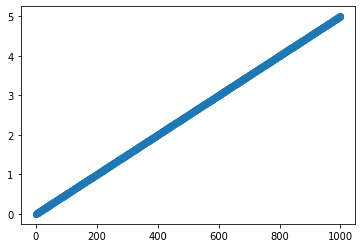

In [11]:
plt.plot(particles.r, 'o')

In [44]:
new_beam

array([(-1.93866207e-04, 1.96299872, 800191.54749898,  6.88082734,  13.97614101, 0.00053236, 2.34833915e-05,     0),
       (-3.40703798e-02, 1.16905435, 800270.84530705, -2.13330639, -10.23745237, 0.00053236, 2.34833915e-05,   271),
       (-3.39453531e-02, 1.65192636, 800108.58156189,  4.4099173 ,   2.95504683, 0.00053236, 2.34833915e-05,   270),
       ...,
       (-3.61609315e+00, 0.55501781, 800206.71999671,  9.85047638,   3.11629414, 0.00053236, 2.34833915e-05, 10024),
       (-3.71979168e+00, 2.01816507, 800111.93049007,  5.98397366, -25.61478773, 0.00053236, 2.34833915e-05, 10025),
       (-3.89133915e+00, 0.32358659, 800174.137536  ,  5.20951291,  -2.2991208 , 0.00053236, 2.34833915e-05, 10026)],
      dtype=[('xi', '<f8'), ('r', '<f8'), ('p_z', '<f8'), ('p_r', '<f8'), ('M', '<f8'), ('q_m', '<f8'), ('q_norm', '<f8'), ('id', '<i8')])

In [43]:
new_beam=beam_drain.beam_slice()

In [6]:
import matplotlib.pyplot as plt
plt.hist2d(beam[:-1]['xi'],beam[:-1]['r'],200)
plt.title('Generated')
plt.show()
plt.hist2d(new_beam['xi'],new_beam['r'],200)
plt.title('First iteration')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [10]:
beam

array([(-2.49992847e-05, 0.84314259, 800135.83420655,   4.85041371,   4.07986589, 5.32359081e-04, 2.34833915e-05,     0),
       (-4.99985693e-05, 1.77689592, 800114.52068725, -11.97283817,  19.08693634, 5.32359081e-04, 2.34833915e-05,     1),
       (-7.49978541e-05, 1.2743257 , 800409.98726181,  15.10705539, -28.16509526, 5.32359081e-04, 2.34833915e-05,     2),
       ...,
       (-4.10809798e+00, 0.97078229, 800237.88319419,  -1.34948635,   2.63241447, 5.32359081e-04, 2.34833915e-05, 50131),
       (-4.26548834e+00, 1.80649106, 800327.74181609,  -7.51620632,  -8.55037773, 5.32359081e-04, 2.34833915e-05, 50132),
       (-1.00000000e+05, 0.        ,      0.        ,   0.        ,   0.        , 1.00000000e+00, 0.00000000e+00,     0)],
      dtype=[('xi', '<f8'), ('r', '<f8'), ('p_z', '<f8'), ('p_r', '<f8'), ('M', '<f8'), ('q_m', '<f8'), ('q_norm', '<f8'), ('id', '<i8')])

In [11]:
new_beam.sort(order=['id'])

In [12]:
new_beam

array([(-3.00572633e-04, 0.843749  , 800135.83169435,   4.85387324,   4.0798659 , 0.00053236, 2.34833915e-05,     0),
       (-3.25603140e-04, 1.77540004, 800114.51931435, -11.9647214 ,  19.08693635, 0.00053236, 2.34833915e-05,     1),
       (-3.50434731e-04, 1.2762161 , 800409.98525234,  15.15483098, -28.16509527, 0.00053236, 2.34833915e-05,     2),
       ...,
       (-4.01371775e+00, 2.07371169, 800343.39009238,  -7.2656822 ,  11.59297107, 0.00053236, 2.34833915e-05, 50130),
       (-4.10837348e+00, 0.97061624, 800238.22198097,  -1.30813837,   2.63240763, 0.00053236, 2.34833915e-05, 50131),
       (-4.26576378e+00, 1.80555586, 800327.91878058,  -7.45324637,  -8.55035957, 0.00053236, 2.34833915e-05, 50132)],
      dtype=[('xi', '<f8'), ('r', '<f8'), ('p_z', '<f8'), ('p_r', '<f8'), ('M', '<f8'), ('q_m', '<f8'), ('q_norm', '<f8'), ('id', '<i8')])

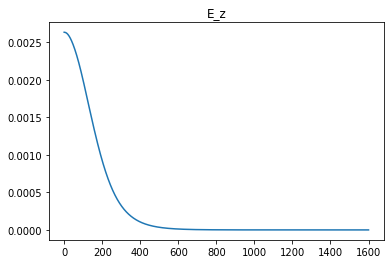

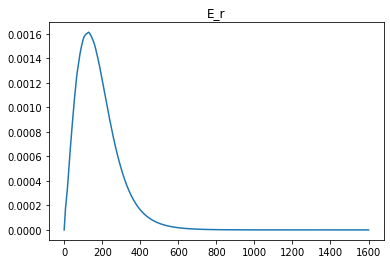

In [13]:
plt.plot(np.array(fields.E_z))
plt.title('E_z')
plt.show()
plt.plot(np.array(fields.E_r))
plt.title('E_r')
plt.show()